<a href="https://colab.research.google.com/github/aso85b/Python-Projects/blob/master/SampleML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install quandl
!pip3 install numpy
!pip3 install pandas
!pip3 install preprocessing
!pip3 install scikit-learn
!pip3 install train_test_split 
!pip3 install svm

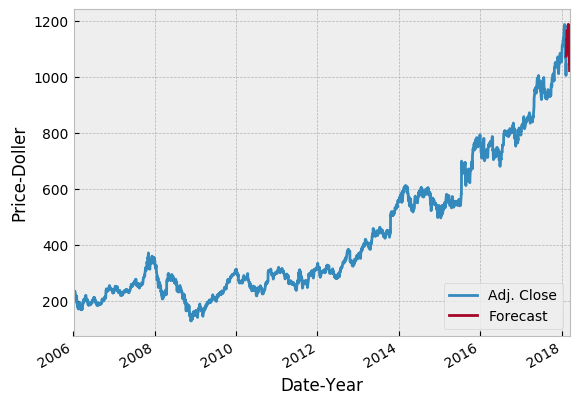

In [0]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

plt.rcdefaults()
style.use('bmh') 

df = quandl.get("WIKI/GOOGL", start_date="2005-12-31", end_date="2019-08-30")  
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']] 
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0    
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']] 
forecast_col = 'Adj. Close' 
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
#print(confidence)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan


last_date = df.iloc[-1].name        
last_unix = last_date.timestamp()   
one_day = 86400                     
next_unix = last_unix + one_day     

for i in forecast_set:
  try:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400                     
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
  except:
    print("Something else went wrong") 
  
  
df['Adj. Close'].plot()     
df['Forecast'].plot()       
plt.legend(loc=4)           
plt.xlabel('Date-Year')          
plt.ylabel('Price-Doller')         
plt.show()
